In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.8
from svg2emf import svg2emf
from DEPENDENCIES.recycle import *
Z = 18

In [2]:
fnames = !dir /b /a-d DZ
fnames

['gH-POPC5-46-r1_PRO1-6_dz.sfu',
 'gH-POPC5-46-r2_PRO1-5_dz.sfu',
 'gH-POPC5-46_PRO1_dz.sfu',
 'gH-POPC6-46-r1_PRO1-4_dz.sfu',
 'gH-POPC6-46-r2_PRO1-4_dz.sfu',
 'gH-POPC6-46_PRO1_dz.sfu',
 'NP61-POPC5-46-r2_PRO5_dz.sfu',
 'NP61-POPC5-46-r4_PRO1-8_dz.sfu',
 'NP61-POPC5-46_PRO3_dz.sfu',
 'NP61-POPC6-46-r1_PRO1-4_dz.sfu',
 'NP61-POPC6-46-r2_PRO1-4_dz.sfu',
 'NP61-POPC6-46_PRO1_dz.sfu',
 'NP610-POPC5-46-r1_PRO1-5_dz.sfu',
 'NP610-POPC5-46-r2_PRO1-5_dz.sfu',
 'NP610-POPC5-46_PRO1-8_dz.sfu',
 'NP610-POPC6-46-r1_PRO1-4_dz.sfu',
 'NP610-POPC6-46-r2_PRO1-4_dz.sfu',
 'NP610-POPC6-46_PRO1_dz.sfu',
 'NP610c-POPC5-46_PRO1-5_dz.sfu',
 'NP610c-POPC6-46_PRO1-4_dz.sfu']

In [3]:
key_dir = {'gH': 'gH',
          'NP61': 'gHNP',
          'NP610': 'NP0',
          'NP610c': 'CitNP'}

btimes = {'gH5' : 780,
         'gH5-1': 313,
         'gH5-2': 45,
         'gH6'  : 50,
         'gH6-1': 38,
         'gH6-2': 46,
         'NP05'  : 329,
         'NP05-1': 326,
         'NP05-2': 24,
         'NP06'  : 215,
         'NP06-1': 496,
         'NP06-2': 723,
         'gHNP5' : 895,
         'gHNP5-4' : 550,
         'gHNP5-2' : 852,
         'gHNP6' : 126,
         'gHNP6-1' : 227,
         'gHNP6-2' : 533,
         'CitNP5' : 1000,
         'CitNP6' : 1000,}

def key_extractor(fname):
    l = fname.split('-')
    sol = l[0]
    mem = l[1][-1]
    try:
        if "r" in l[3]:
            rep = "-"+l[3][1]
        else:
            rep=""
    except:
        rep = ""
    return key_dir[sol]+mem+rep

In [8]:
def clean_dz(key, data):
    data[:,0] = data[:,0] - np.max(data[:,0]) + 1000000
    data[:,0] /= 1000
    data[:,1] /= 10
    mask = np.logical_and(data[:,1]<3.4, data[:,0]<btimes[key])
    data[mask,1] = np.max(data[:,1]) - data[mask,1]
    data = data[data[:,0]>0]
    return data

In [9]:
DZ = {}
for f in fnames:
    key = key_extractor(f)
    data_tmp = read_text_file("DZ/"+f)
    DZ[key] = clean_dz(key, data_tmp)

In [10]:
DZ.keys()

dict_keys(['gH5-1', 'gH5-2', 'gH5', 'gH6-1', 'gH6-2', 'gH6', 'gHNP5-2', 'gHNP5-4', 'gHNP5', 'gHNP6-1', 'gHNP6-2', 'gHNP6', 'NP05-1', 'NP05-2', 'NP05', 'NP06-1', 'NP06-2', 'NP06', 'CitNP5', 'CitNP6'])

dict_keys(['gH5-1', 'gH5-2', 'gH5'])


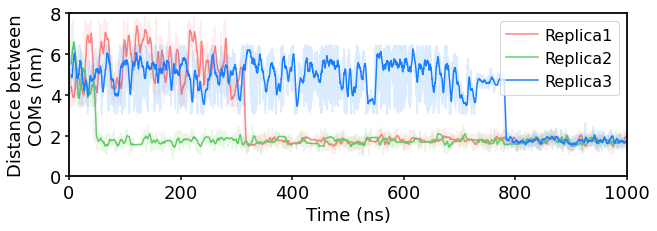

dict_keys(['gH6-1', 'gH6-2', 'gH6'])


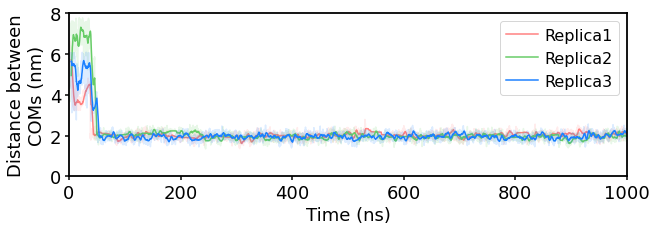

dict_keys(['NP05-1', 'NP05-2', 'NP05'])


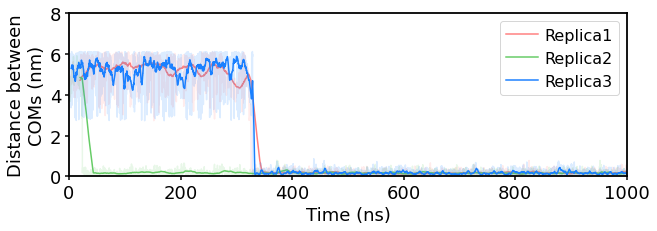

dict_keys(['NP06-1', 'NP06-2', 'NP06'])


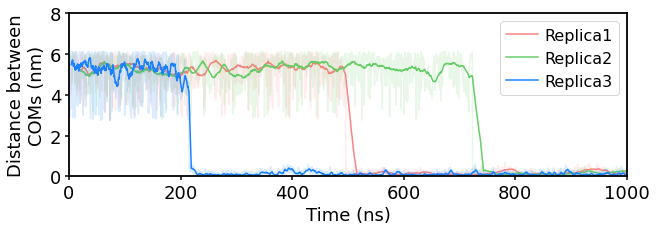

dict_keys(['gHNP5-2', 'gHNP5-4', 'gHNP5'])


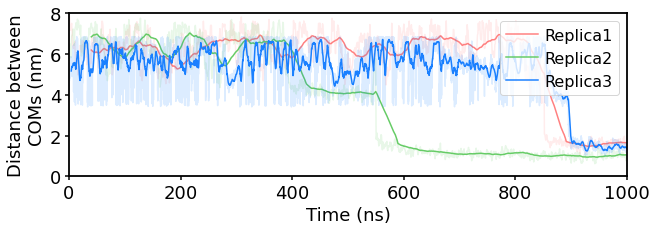

dict_keys(['gHNP6-1', 'gHNP6-2', 'gHNP6'])


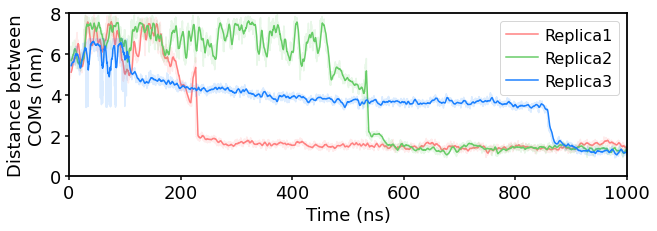

dict_keys(['CitNP5'])


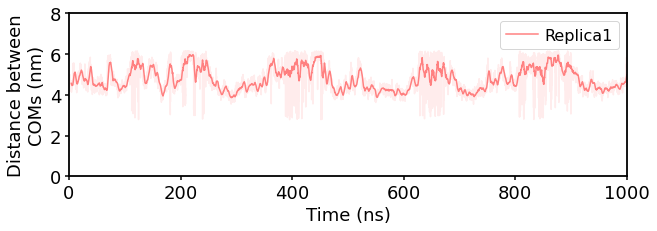

dict_keys(['CitNP6'])


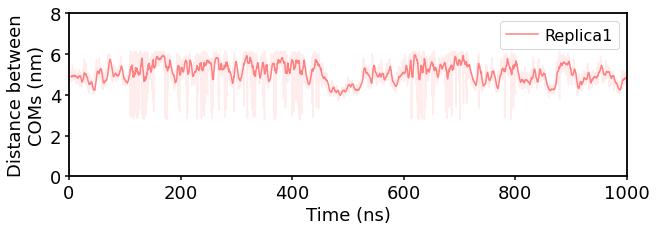

In [11]:
def plot_dz(basename, nw=50):
    colors_rep = [(1,0.5,0.5), (0.4,0.8,0.4), (0.1,0.5,1.0), (0.8,0.8,0.3)]
    data = {key: val for key, val in DZ.items() if basename in key}
    print(data.keys())
    fig, ax = plt.subplots(figsize=(10,3))
    ax.set_xlim(0,1000)
    ax.set_ylim(0,8)
    ax.set_xlabel('Time (ns)', fontsize=Z)
    ax.set_ylabel('Distance between\nCOMs (nm)', fontsize=Z)
    ax.tick_params(labelsize=Z, size=4, width=1.5)
    for i, dz in enumerate(data.values()):
        ax.plot(*dz.T, alpha=0.15, c=colors_rep[i], lw=1.5)
        ax.plot(dz[nw-1:,0], ma(dz[:,1], n=nw), alpha=1, c=colors_rep[i], label='Replica{}'.format(i+1), lw=1.5)
    ax.legend(fontsize=Z-2, loc='upper right', handletextpad=0.4)
    plt.savefig("Plots/"+basename+"_dz.svg", format='svg', bbox_inches='tight')
    svg2emf("Plots/"+basename+"_dz.svg")
    plt.show()
    plt.close()

plot_dz('gH5')
plot_dz('gH6')
plot_dz('NP05')
plot_dz('NP06')
plot_dz('gHNP5')
plot_dz('gHNP6')
plot_dz('CitNP5')
plot_dz('CitNP6')